In [108]:
%load_ext autoreload
%autoreload 2
from keychest_vae.data import learner, h, w, c, engine, plot_data, get_dataloader
from keychest_vae.vae import ObsNet, ObsModel
import gin
import numpy as np
from matplotlib import pyplot as plt
import torchvision
from torch.autograd import Variable
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
learner, engine, (h, w, c)

(<Learner env=<KeyChestGymEnv<KeyChest-v0>> feature_shape=(30,) epochs=0>,
 (12, 7, 11))

In [35]:
train_loader = get_dataloader(1000)
eval_loader = get_dataloader(1000)

Make environment KeyChest-v0 None {}



3.0
3.0
Make environment KeyChest-v0 None {}



3.0
3.0


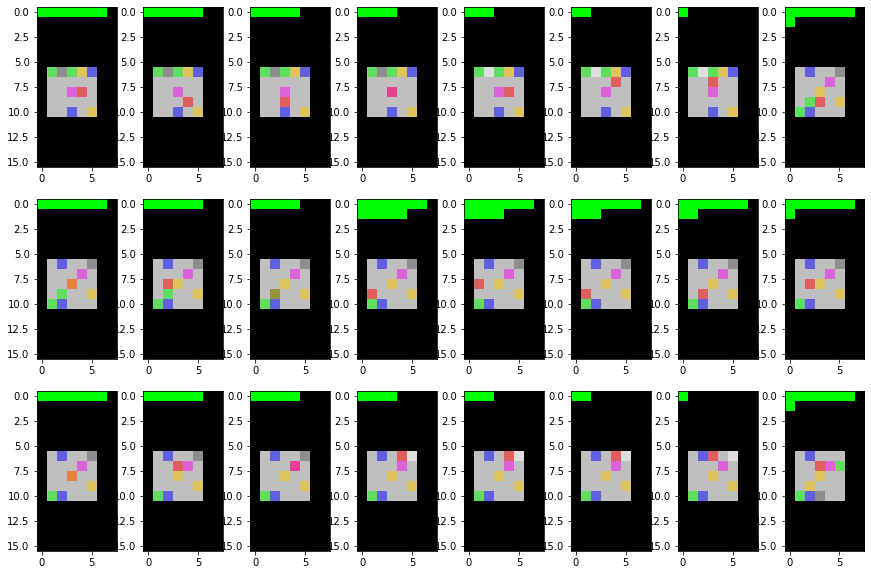

In [36]:
plot_data(np.rollaxis(train_loader.dataset.tensors[0].numpy(), 1, 4))

In [67]:
m = ObsModel(train_loader, eval_loader)

In [74]:
for _ in range(100):
    m.train()

====> Average loss: 67.5785083770752 MAE: 0.0863930732011795
====> Average loss: 66.68937110900879 MAE: 0.08378127962350845
====> Average loss: 66.02417755126953 MAE: 0.08184891194105148
====> Average loss: 65.35906600952148 MAE: 0.08006207272410393
====> Average loss: 64.65581893920898 MAE: 0.07862158492207527
====> Average loss: 64.19364929199219 MAE: 0.07776522636413574
====> Average loss: 63.72421073913574 MAE: 0.0768137015402317
====> Average loss: 63.185781478881836 MAE: 0.07607332244515419
====> Average loss: 62.75214385986328 MAE: 0.07494993880391121
====> Average loss: 62.27853012084961 MAE: 0.0743245966732502
====> Average loss: 61.791481018066406 MAE: 0.07338874414563179
====> Average loss: 61.347429275512695 MAE: 0.07252397760748863
====> Average loss: 61.00042533874512 MAE: 0.07172617688775063
====> Average loss: 60.6440315246582 MAE: 0.0708201713860035
====> Average loss: 60.2722110748291 MAE: 0.06997447460889816
====> Average loss: 59.79530906677246 MAE: 0.06911255046725

In [54]:
m.eval()

====> Average loss: 190.5186767578125 MAE: 0.37079648673534393


{'eval_loss': 190.5186767578125, 'eval_mae': 0.37079648673534393}

In [10]:
# mnist = torchvision.datasets.MNIST("./mnist", train=True, download=True, transform=transforms.Compose([
#                                                               transforms.ToTensor(), # first, convert image to PyTorch tensor
#                                                           ]))
# action_dummy = TensorDataset(torch.zeros((len(mnist), 4)))
# mnist_loader = DataLoader(mnist, batch_size=512, shuffle=True)

# gin.bind_parameter('ObsNet.input_channels', 1)
# gin.bind_parameter('ObsNet.hid_x', 14)
# gin.bind_parameter('ObsNet.hid_y', 14)

# m = ObsModel(mnist_loader)

In [90]:
def get_images(m, loader):
    m.model.eval()
    _, (states, actions, next_states) = next(enumerate(loader))
    states = Variable(states).cuda()
    actions = Variable(actions).cuda()
    next_states = Variable(next_states).cuda()

    # mnist
    # states = next(enumerate(m.train_loader))[1][0].cuda()
    # actions = torch.zeros((states.shape[0], 4)).cuda()
    # next_states = states
    
    out, _, _ = m.model(states, actions)
    out = np.rollaxis(out.detach().cpu().numpy(), 1, 4)
    return out

In [112]:
train_images = get_images(m, train_loader)
eval_images = get_images(m, eval_loader)
demo_images = np.rollaxis(train_loader.dataset.tensors[0].numpy(), 1, 4)

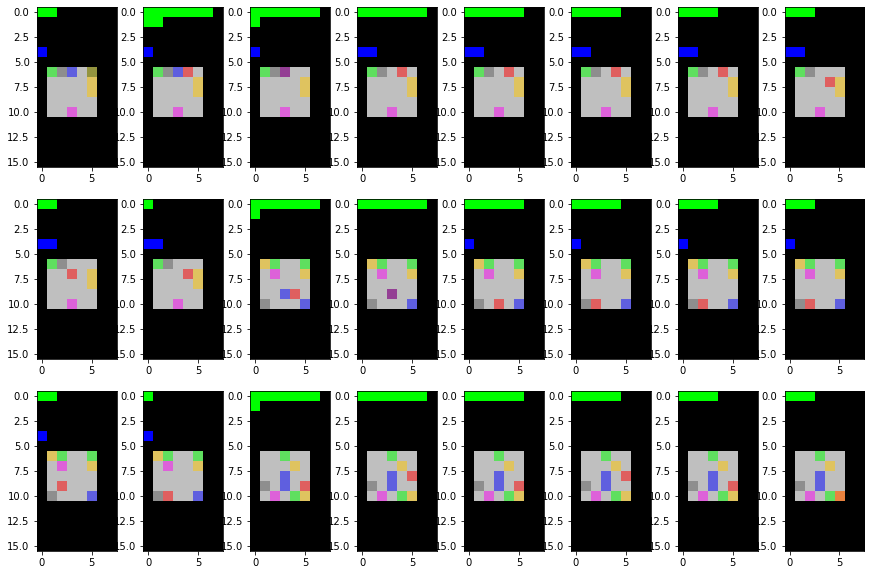

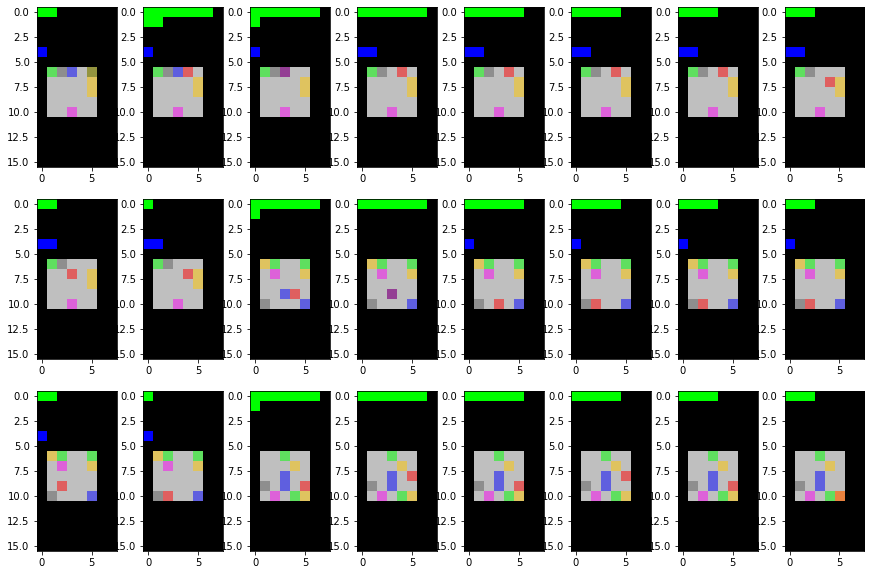

In [113]:
plot_data(demo_images)

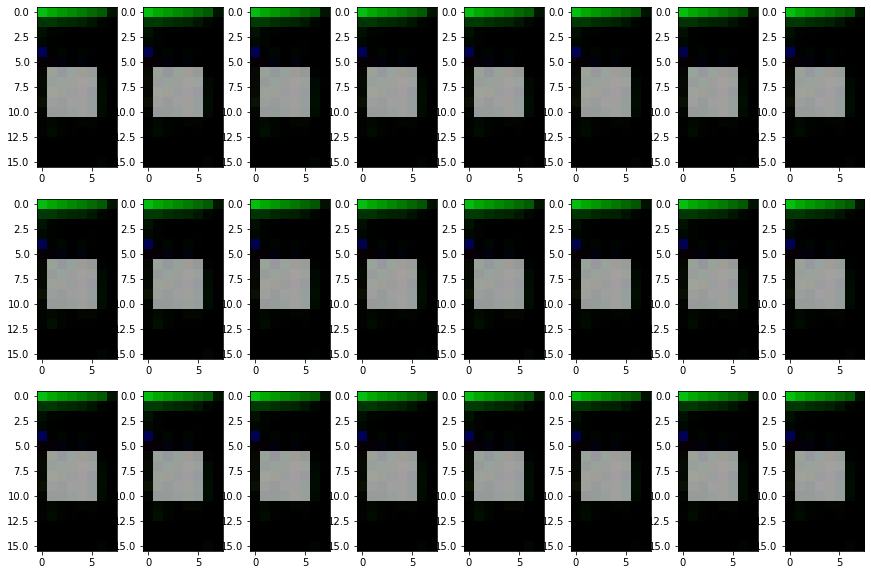

In [92]:
plot_data(train_images)

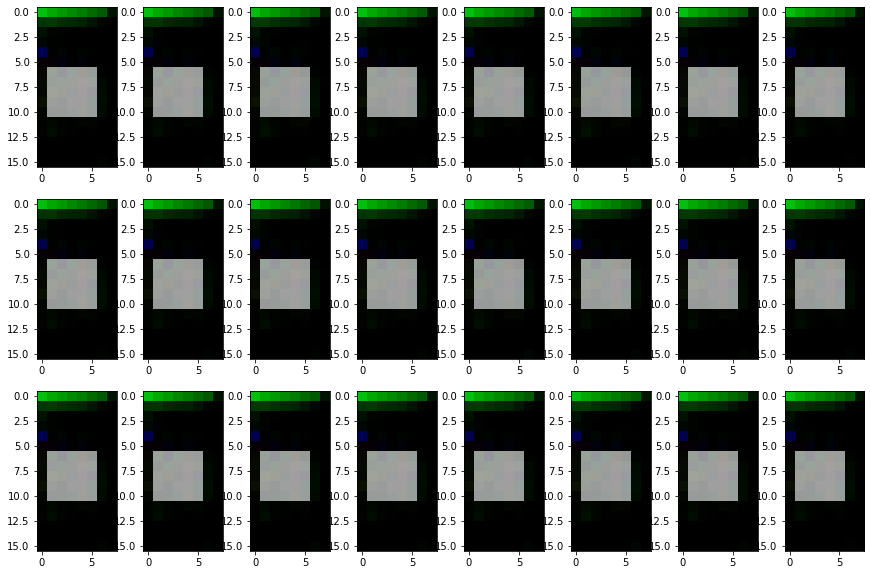

In [93]:
plot_data(eval_images)

In [115]:
train_image_idx = np.random.choice(range(len(train_images)))
eval_image_idx = np.random.choice(range(len(eval_images)))
demo_image_idx = np.random.choice(range(len(demo_images)))


train_image = train_images[train_image_idx]
eval_image = eval_images[eval_image_idx]
demo_image = demo_images[demo_image_idx]

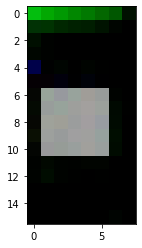

In [109]:
plt.imshow(eval_image)

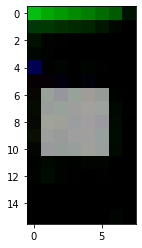

In [110]:
plt.imshow(train_image)

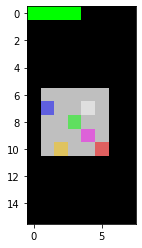

In [116]:
plt.imshow(demo_image)